# Tarea 8: Cálculo de derivadas finitas

__Ejercicio 1__. Escribe una función `derivadaNumerica` que
reciba: una función $f\colon \mathbb{R}\mapsto\mathbb{R}$,
un punto $x_0\in\mathbb{R}$ y un número $h\in\mathbb{R}$. Esta función deberá calcular una aproximación a la
derivada utilizando la definición indicada arriba ignorando
la parte del límite. Es decir, algo como: `derivada_numerica(f,x,h)`.


Empleando que $$
f'(x) \approx\frac{f(x+h)-f(x)}{h}.
$$

In [5]:
function derivada_numerica(f::Function,x,h)
    df=(f(x+h)-f(x))/h
    return df
end

derivada_numerica (generic function with 1 method)

-----
__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. 

In [81]:
#Ejemplo con h=.0001 y x_0 en 0
x_0=.5
f(x)=cos(x)
derivada_numerica(cos,x_0,.0001)

-0.4794694169341085

Compara tu resultado con el que indica el
cálculo exacto. 

In [125]:
#Usamos simpy para tener el cálculo exacto a la mano y modificar la evaluación cuando queramos:
using SymPy
x=symbols("x")
df=(diff(f(x))) #Este es un g(x)=-sin(x)

-sin(x)

In [126]:
dfJ=lambdify(df)
df(x_0)

-0.479425538604203

Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.

Creamos una partición entre $[0,1]$ con n+1 digitos con distancias de intervalos iguales, donde para calcular la derivada numerica y el $\frac{1}{h}$ se empleo el siguiente número después del 0 para iniciar la cuenta y para no tener dificultades con el $\frac{1}{0}$

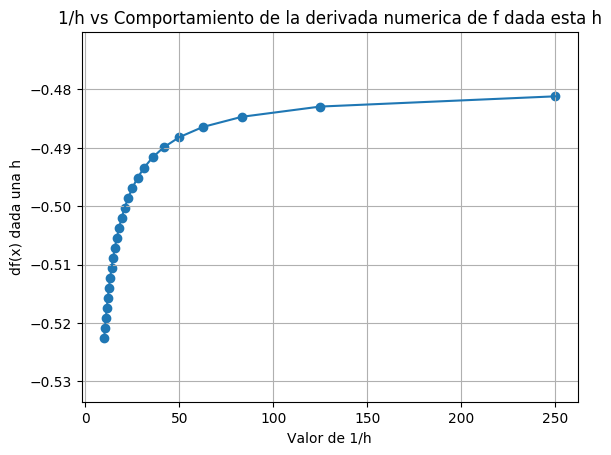

In [150]:
using PyPlot
#n será el número de puntos a graficar
n=25
#Definición que tomaremos para calcular varios h's
h=linspace(0,.1,n+1)
#El eje x será 1/h
ejex1=zeros(n)
#El eje y será el valor de la derivada
ejey1=zeros(n)
#Tomaremos valores de h=1/i donde i variará desde 1 hasta n
for i in 1:n
    ejex1[i]=1/h[i+1]
    ejey1[i]=derivada_numerica(f,x_0,h[i+1])
end
#Graficación
scatter(ejex1,ejey1)
plot(ejex1,ejey1)
grid("on")
ylabel("df(x) dada una h")
xlabel("Valor de 1/h")
title("1/h vs Comportamiento de la derivada numerica de f dada esta h")
show()


Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$
respecto a $h$.
Donde $\Delta f(x,h)=f(x+h)-f(x)$.

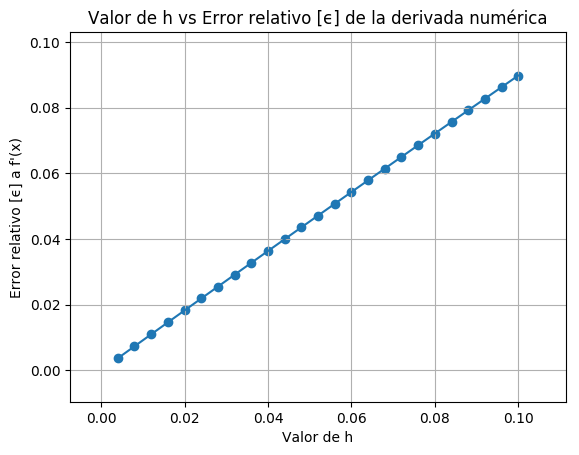

In [159]:
using PyPlot
#"n" tomando el mismo número de puntos a graficar
#"la misma definición de h"
#El eje x será h
ejex2=zeros(n)
#El eje y será el valor del error relativo a  f′(x0)
ejey2=zeros(n)
#Recolección de datos
for i in 1:n
    ϵ=((derivada_numerica(f,x_0,h[i+1]))-dfJ(x_0))/dfJ(x_0)
    ejex2[i]=h[i+1]
    ejey2[i]=ϵ
end
#Graficación
scatter(ejex2,ejey2)
plot(ejex2,ejey2)
grid("on")
ylabel("Error relativo [ϵ] a f'(x)")
xlabel("Valor de h")
title("Valor de h vs Error relativo [ϵ] de la derivada numérica")
show()

En esta grafica observamos que sí: el error esta determinado de manera lineal con h.

------
__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

__Nota:__ Entregar en $\LaTeX$ en el notebook de la tarea.

Tenemos que
$$
 f(x_{i}+\Delta x)=  \sum_{n=0}^{\infty} \frac{(\Delta x)^{n}}{n!}   \left. \frac{d^{(n)}f(x)}{dx^{(n)}}  \right|_{{x=x_i }}
$$
$$
 f(x_{i}-\Delta x)=  \sum_{n=0}^{\infty} \frac{(-\Delta x)^{n}}{n!}   \left. \frac{d^{(n)}f(x)}{dx^{(n)}}  \right|_{{x=x_i }}
$$

$$ \rightarrow f(x_i+\Delta x) - f(x_i-\Delta x)
= \sum_{n=0}^{\infty} \frac{{1}}{n!}   \left. \frac{d^{(n)}f(x)}{dx^{(n)}}  \right|_{{x=x_i }}   [ (\Delta x)^{n} 
- (-\Delta x)^{n}  ]
=  \sum_{n=0}^{\infty} \frac{{1}}{(2n+1)!}   \left. \frac{d^{(2n+1)}f(x)}{dx^{(2n+1)}}  \right|_{{x=x_i }}   2(\Delta x)^{2n+1} $$

Cortando la serie hasta el primer orden se tiene que: $O(\Delta x^3) = \sum_{n=1}^{\infty} \frac{{1}}{(2n+1)!}   \left. \frac{d^{(2n+1)}f(x)}{dx^{(2n+1)}}  \right|_{{x=x_i }}   (\Delta x)^{2n} $

\begin{equation} \rightarrow f(x_i+\Delta x) - f(x_i-\Delta x) =
\left. \frac{df(x)}{dx}  \right|_{{x=x_i }}    2\Delta x + O(\Delta x^3)2\Delta x
\end{equation}

Por tanto:

$$
\left. \frac{df(x)}{dx}  \right|_{{x=x_i }}
= \frac{ f(x_i+\Delta x) - f(x_i-\Delta x) }{2\Delta x}- O(\Delta x^3)
$$

$$
\rightarrow \frac{df(x_i)}{dx} \approx  \frac{ f(x_i+\Delta x) - f(x_i-\Delta x) }{2\Delta x}
$$

Donde notamos que si el error $O(\Delta x^2)$ es el error brindado por el método anterior unicamente considerando cuales quiera de las primeras dos ecuaciones, ya que en estos dos métodos su error sí considera polinomios de grado par en su serie de Taylor.
$\rightarrow O(\Delta x^2)>O(\Delta x^3)$, por tanto nuestro método mejoró la aproximación.

-----
__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [147]:
function derivada_Simetrica(f::Function,x,h)
    df=(f(x+h)-f(x-h))/2h
    return df
end

derivada_Simetrica (generic function with 1 method)

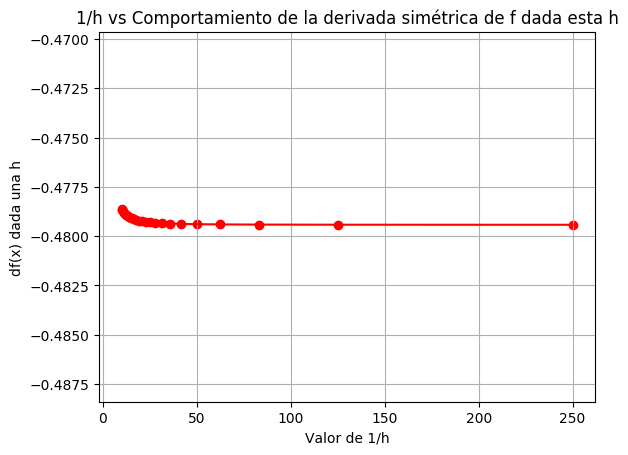

In [156]:
using PyPlot
#n será el número de puntos a graficar
n=25
#Definición que tomaremos para calcular varios h's
h=linspace(0,.1,n+1)
#El eje x será 1/h
ejex3=zeros(n)
#El eje y será el valor de la derivada
ejey3=zeros(n)
#Tomaremos valores de h=1/i donde i variará desde 1 hasta n
for i in 1:n
    ejex3[i]=1/h[i+1]
    ejey3[i]=derivada_Simetrica(f,x_0,h[i+1])
end
#Graficación
scatter(ejex3,ejey3, color="red")
plot(ejex3,ejey3, color="red")
grid("on")
ylabel("df(x) dada una h")
xlabel("Valor de 1/h")
title("1/h vs Comportamiento de la derivada simétrica de f dada esta h")
show()

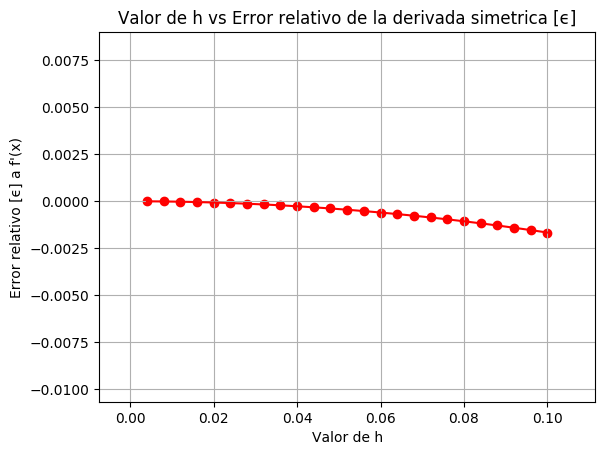

In [158]:
using PyPlot
#"n" tomando el mismo número de puntos a graficar
#"la misma definición de h"
#El eje x será h
ejex4=zeros(n)
#El eje y será el valor del error relativo a  f′(x0)
ejey4=zeros(n)
#Recolección de datos
for i in 1:n
    ϵ=((derivada_Simetrica(f,x_0,h[i+1]))-dfJ(x_0))/dfJ(x_0)
    ejex4[i]=h[i+1]
    ejey4[i]=ϵ
end
#Graficación
scatter(ejex4,ejey4, color="red")
plot(ejex4,ejey4, color="red")
grid("on")
ylabel("Error relativo [ϵ] a f'(x)")
xlabel("Valor de h")
title("Valor de h vs Error relativo de la derivada simetrica [ϵ]")
show()

----
Analizando la serie de la diferencia finita hacia adelante podemos factorizar la función útilizando la propiedad de linealidad del operador derivada, antes pasando del lado izquierdo de la serie a $f(x)$: 

$$
f(x+h)-f(x)= \left[h \left. \frac{d}{d \xi}  \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}   \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}   \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}$$
$$
=\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x)
$$

Luego podemos definir el operador $\Delta_h$, el cual se define como:
$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h).$$
__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

$$PD: \Delta_h (f+cg)= \Delta_h f + c\Delta_h g$$
$$ \Delta_h (f+cg)
= \left[ \sum_{n=1}^{\infty} {\frac{1}{n!}h^n} \left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right] (f+cg)
= \sum_{n=1}^{\infty} {\frac{1}{n!}h^n}   \left.\frac{d^n (f+cg)}{d\xi^n}\right|_{\substack{ \xi=x }} 
= \sum_{n=1}^{\infty} {\frac{1}{n!}h^n}
 \left[ \left.\frac{d^n f}{d\xi^n}\right|_{\substack{ \xi=x }} +
 c \left.\frac{d^n g}{d\xi^n}\right|_{\substack{ \xi=x }} \right]
$$
$$
= \left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right] (f) +
c \left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right] (g)
= \Delta_h f + c\Delta_{h} g \space \blacklozenge 
$$

----
__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

$PD: \phi(x)=e^x-1$
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right) 
=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}
$$
(por notación y si suponemos válido:) 
$$= \sum_{n=1}^{\infty}  \frac{1}{n!} \left( 
h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }} \right)^n = (*)
$$
 Si $x =  h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }} $
 
 $$\rightarrow (*) = \sum_{n=1}^{\infty}  \frac{1}{n!} \left( x \right)^n =
 \sum_{n=0}^{\infty}  \frac{1}{n!} \left( x \right)^n - 1 = e^x-1 = \phi(x)
 \space \blacklozenge $$

Demostrado lo anterior es fácil ver que:
$$
\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}=\frac{1}{h}\log\left(1+\Delta_h\right)$$
$$
=\frac{1}{h}\left( \Delta_h-\frac{1}{2}\Delta^2_h +\dots\right).
$$
claramente si tomamos solo el primer término, regresamos a la definición de derivada númerica _hacia adelante_, lo interesante ahora es tomar más terminos de la serie que acabamos de calcular. Tomando dos terminos la derivada se calcula como sigue:
$$f'(x)=\frac{\Delta_h f(x)-\frac{1}{2}\Delta^2_h f(x)}{h}+\mathcal{O}(h^2).$$
Esta forma de calcular la derivada tiene un error del mismo orden que el de la derivada simétrica, lo interesante ahora es tomar mas terminos de la serie y observar como la derivada converge más rápido.

----
__Ejercicio 7:__ Explotar la relación $\delta_h=\Delta_h-\Delta_{-h}$, donde $\delta_h:f(x)\mapsto f(x+h)-f(x-h)$, para encontrar cual es la función $\theta$ que relaciona a $\delta_h$ con el operador derivada exacta, es decir:
$$\delta_h=\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right).$$



Sabemos que $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \rightarrow  \Delta_{-h}=\sum_{n=1}^{\infty} \frac{1}{n!}(-h)^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$   
Como además $\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right) \rightarrow \Delta_{-h}=\phi\left(-h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$. Donde $\phi(y)=e^y-1$   
$\rightarrow \delta_h
= \phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right) - \phi\left(-h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$. Donde buscamos $\delta_h=\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right).$  
Si escribimos a $x=h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }} \rightarrow 
\theta(x) = e^x-1 - e^{-x}+1 = e^x-e^{-x}=2 \mathrm{sinh(}x\mathrm{)}$

Una vez que la encuentren, despejen $\left. \frac{d}{d\xi}\right|_{\xi=x}$ y calculen la serie de Taylor de mánera similar a lo mostrado en las ecuaciones anteriores.

$\delta_h=\theta(x)=2\mathrm{sinh(}x\mathrm{)} \rightarrow x=\sinh^{-1}(\frac{\delta_h}{2})= 
\log \left(\frac{\delta_h}{2}+ \sqrt{\left(\frac{\delta_h}{2}\right)^2+1} \right)$. entonces:

$$
\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}=\frac{1}{h}\log \left(\frac{\delta_h}{2}+ \sqrt{\left(\frac{\delta_h}{2}\right)^2+1} \right) 
= \frac{1}{h}\log \left( 1 + \left[ 
\frac{\delta_h}{2} -1+ \sqrt{\left(\frac{\delta_h}{2}\right)^2+1}  
\right]\right) 
$$
$$
=\frac{1}{h}\left( 
\left( 
\frac{\delta_h}{2} -1+ \sqrt{\left(\frac{\delta_h}{2}\right)^2+1}  
\right)
-\frac{1}{2}
\left( 
\frac{\delta_h}{2} -1+ \sqrt{\left(\frac{\delta_h}{2}\right)^2+1}  
\right)^2
+\dots\right)
$$

*****
```python
F F M G
```